In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
from IPython.display import Image

import matplotlib.pyplot as plt

from config import min_freq, max_freq, radius_s
from constants import max_density_dict, space_size_dict, colors
from src.utils import closest_power_of_two, calculate_vol_hypersphere, calculate_no_spheres

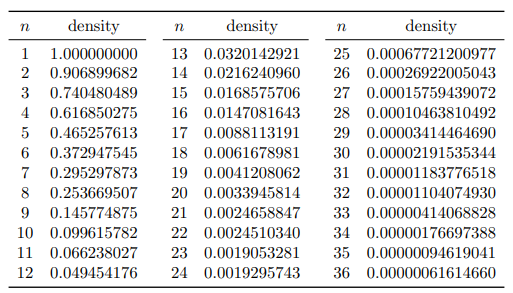

In [ ]:
Image(filename="assets/inputs/density_dim.png", width=500)

Text(0.5, 1.0, 'Max density')

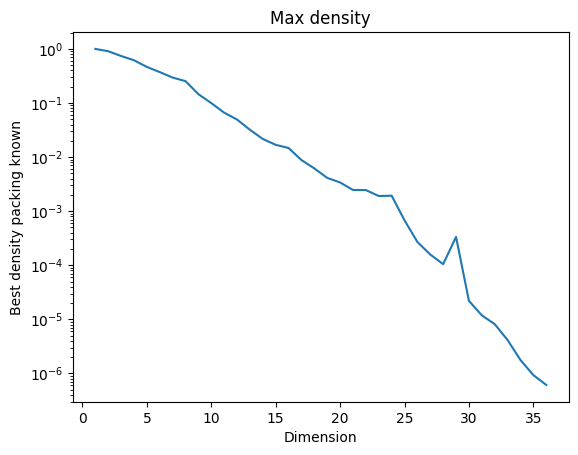

In [4]:
plt.plot(max_density_dict.keys(), max_density_dict.values())
plt.xlabel('Dimension')
plt.ylabel('Best density packing known')
plt.yscale('log')
plt.title('Max density')
# plt.savefig('assets/outputs/density_plot.png', bbox_inches='tight', dpi=1200)

## Number of spheres and bits of communication calculation

Sound frequency bands 

- Sub-bass (20-60 Hz): This is the lowest audible range, often associated with the rumble and energy of deep instruments like kick drums and bass lines.
- Bass (60-250 Hz): This range contains the fundamental frequencies of many instruments, including bass guitars and the lower notes of other instruments.
- Low-midrange (250-500 Hz): This area is where the body of many instruments resides, and it's crucial for overall tonal balance.
- Midrange (500 Hz - 2 kHz): This is a crucial area for clarity and intelligibility, where many instruments' fundamental frequencies and the human voice's core frequencies are located.
- Higher Midrange (2-4 kHz): This range contributes to the presence and attack of sounds, particularly for vocals and percussive instruments.
- Presence (4-6 kHz): This range is important for clarity and articulation, especially for vocals and certain instruments.
- Brilliance (6-20 kHz): This high-frequency range adds sparkle and air to the sound, but excessive energy here can sound harsh.

In [5]:
radius_s = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
min_freq, max_freq = [20, 20000]

### Geometric

Text(0, 0.5, 'Number of bits')

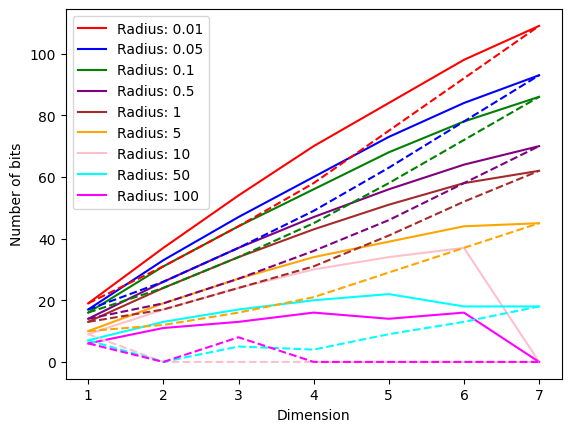

In [6]:
def get_space_bottom_up(no_dim):
    space_size_dict = {
        1: [[20, 20000]],
        2: [[20, 6000], [6000, 20000]],
        3: [[20, 4000], [4000, 6000], [6000, 20000]],
        4: [[20, 2000], [2000, 4000], [4000, 6000], [6000, 20000]],
        5: [[20, 500], [500, 2000], [2000, 4000], [4000, 6000], [6000, 20000]],
        6: [[20, 250], [250, 500], [500, 2000], [2000, 4000], [4000, 6000], [6000, 20000]],
        7: [[20, 60], [60, 250], [250, 500], [500, 2000], [2000, 4000], [4000, 6000], [6000, 20000]]
    }
    return space_size_dict.get(no_dim, "Invalid dimension")


def get_space_top_down(no_dim):
    space_size_dict = {
        1: [[20, 20000]],
        2: [[20, 60], [60, 20000]],
        3: [[20, 60], [60, 250], [250, 20000]],
        4: [[20, 60], [60, 250], [250, 500], [500, 20000]],
        5: [[20, 60], [60, 250], [250, 500], [500, 2000], [2000, 20000]],
        6: [[20, 60], [60, 250], [250, 500], [500, 2000], [2000, 4000], [4000, 20000]],
        7: [[20, 60], [60, 250], [250, 500], [500, 2000], [2000, 4000], [4000, 6000], [6000, 20000]]
    }
    return space_size_dict.get(no_dim, "Invalid dimension")


max_dim = 7

no_bits_geometric_bottom_up_dict = {}
no_bits_geomtric_top_down_dict = {}

for radius in radius_s:
    no_bits_geometric_bottom_up_dict[radius] = []
    no_bits_geomtric_top_down_dict[radius] = []

    for no_dim in range(1, max_dim + 1):
        max_density = max_density_dict[no_dim]

        # Bottom-up
        space_size = get_space_bottom_up(no_dim)
        no_spheres, no_bits = calculate_no_spheres(
            space_size=space_size,
            max_density=max_density,
            radius=radius,
            no_dim=no_dim,
        )
        no_bits_geometric_bottom_up_dict[radius].append(no_bits)

        # Top-down
        space_size = get_space_top_down(no_dim)
        no_spheres, no_bits = calculate_no_spheres(
            space_size=space_size,
            max_density=max_density,
            radius=radius,
            no_dim=no_dim,
        )
        no_bits_geomtric_top_down_dict[radius].append(no_bits)

for i, (key, values) in enumerate(no_bits_geometric_bottom_up_dict.items()):
    plt.plot(range(1, len(values)+1), values, label=f'Radius: {key}', color=colors[i])
plt.legend()
for i, (key, values) in enumerate(no_bits_geomtric_top_down_dict.items()):
    plt.plot(range(1, len(values)+1), values, label=f'Radius: {key}', color=colors[i], linestyle='dashed')
plt.xlabel('Dimension')
plt.ylabel('Number of bits')
# plt.savefig('assets/outputs/number_bits_geometric.png', bbox_inches='tight', dpi=1200)

### Arithmetic

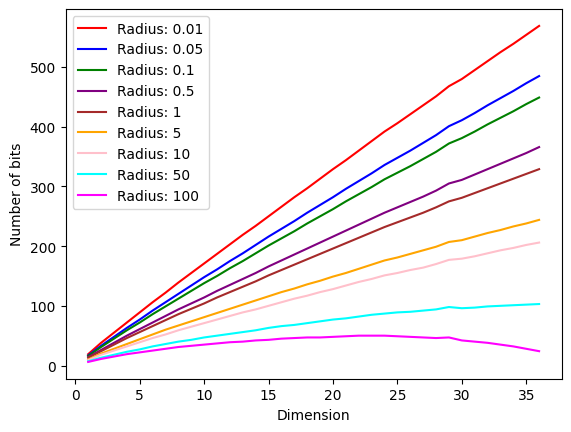

In [7]:
max_dim = 36

no_bits_arithmetic_dict = {}

for radius in radius_s:
    no_bits_arithmetic_dict[radius] = []
    for no_dim in range(1, max_dim+1):
        freq_div = (max_freq - min_freq) / no_dim

        space_size = []
        for i in range(no_dim):
            space_size.append([min_freq + i * freq_div, min_freq + (i + 1) * freq_div])

        max_density = max_density_dict[no_dim]

        no_spheres, no_bits = calculate_no_spheres(
            space_size=space_size,
            max_density=max_density,
            radius=radius,
            no_dim=no_dim,
        )

        no_bits_arithmetic_dict[radius].append(no_bits)

for i, (key, values) in enumerate(no_bits_arithmetic_dict.items()):
    plt.plot(range(1, len(values)+1), values, label=f'Radius: {key}', color=colors[i])
plt.xlabel('Dimension')
plt.ylabel('Number of bits')
plt.legend()
# plt.savefig('assets/outputs/number_bits_arithmetic.png', bbox_inches='tight', dpi=1200)

### Arithmetic vs Geometric

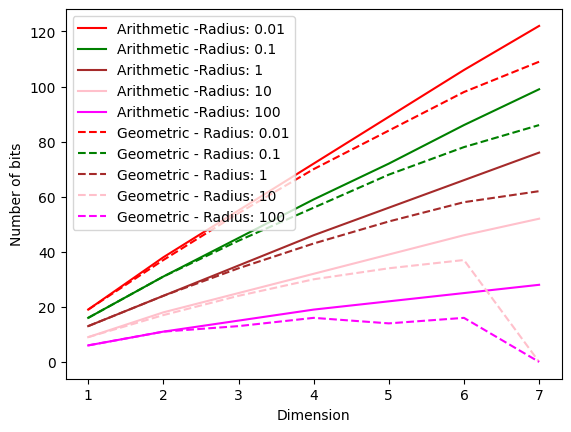

In [8]:
for i, (key, values) in enumerate(no_bits_arithmetic_dict.items()):
    if key not in [0.05, 0.5, 5, 50]:
        plt.plot(range(1, len(values[:7]) + 1), values[:7], label=f'Arithmetic -Radius: {key}', color=colors[i])
plt.legend()

for i, (key, values) in enumerate(no_bits_geometric_bottom_up_dict.items()):
    if key not in [0.05, 0.5, 5, 50]:
        plt.plot(range(1, len(values) + 1), values, label=f'Geometric - Radius: {key}', linestyle='dashed', color=colors[i])
plt.xlabel('Dimension')
plt.ylabel('Number of bits')
plt.legend()
# plt.savefig('assets/outputs/number_bits_comparison.png', bbox_inches='tight', dpi=1200)